In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
%cd /home/stepan/kaggle/cars_from_auction

/home/stepan/kaggle/cars_from_auction


In [3]:
%ls

data/  prepare/  review/


In [4]:
%ls data/

processed/  sample_submission.csv  test_no_target.csv  train.csv  zipcodes.csv


# General review

In [8]:
data = pd.read_csv('data/test_no_target.csv', index_col=0)

In [9]:
data.sample(5)

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price
83736,1.2,small car,2010,manual,76,twingo,100000,gasoline,renault,0.0,89233,130.0
89484,2.0,limousine,2009,auto,220,insignia,60000,gasoline,opel,0.0,49439,900.0
20899,NaN,limousine,2008,manual,143,1er,80000,gasoline,bmw,0.0,10785,730.0
25126,NaN,limousine,2011,manual,143,3er,60000,gasoline,bmw,NaN,15831,810.0
84638,1.6,station wagon,2005,manual,113,megane,150000,gasoline,renault,0.0,23863,200.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 60314 to 478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_capacity    20086 non-null  float64
 1   type               43834 non-null  object 
 2   registration_year  50000 non-null  int64  
 3   gearbox            48021 non-null  object 
 4   power              50000 non-null  int64  
 5   model              47671 non-null  object 
 6   mileage            50000 non-null  int64  
 7   fuel               46408 non-null  object 
 8   brand              50000 non-null  object 
 9   damage             41773 non-null  float64
 10  zipcode            50000 non-null  int64  
 11  insurance_price    42594 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 5.0+ MB


## Visualize

In [11]:
default_figsize = (16, 12)
plt.rcParams.update({'font.size': 18})

<AxesSubplot:>

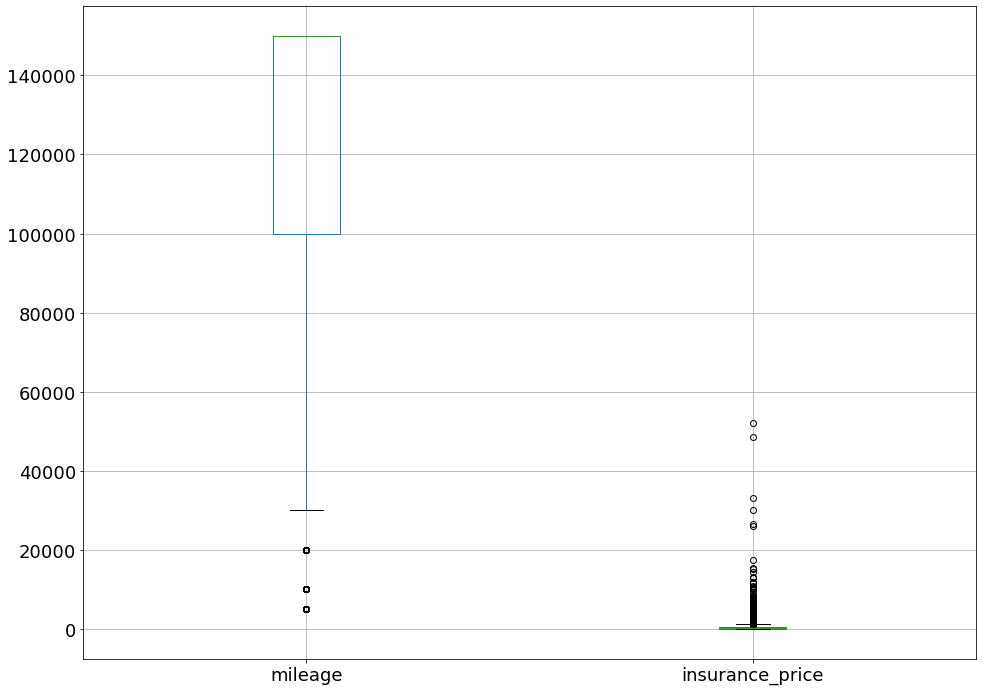

In [14]:
data.boxplot(figsize=default_figsize, column=['mileage', 'insurance_price'])

<AxesSubplot:>

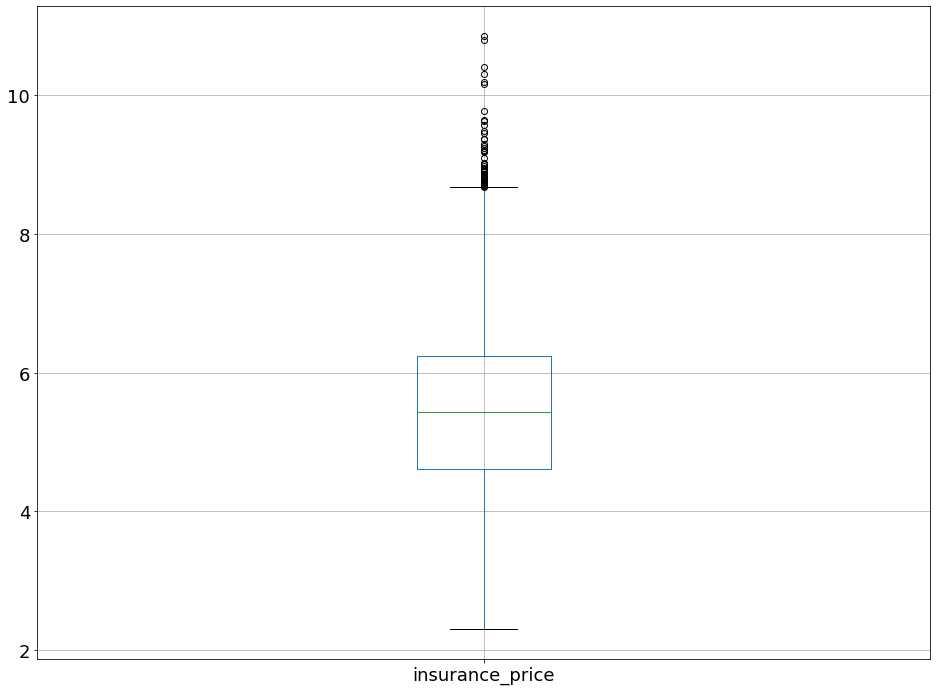

In [23]:
pd.DataFrame(np.log(data['insurance_price'])).boxplot(figsize=default_figsize)

<AxesSubplot:>

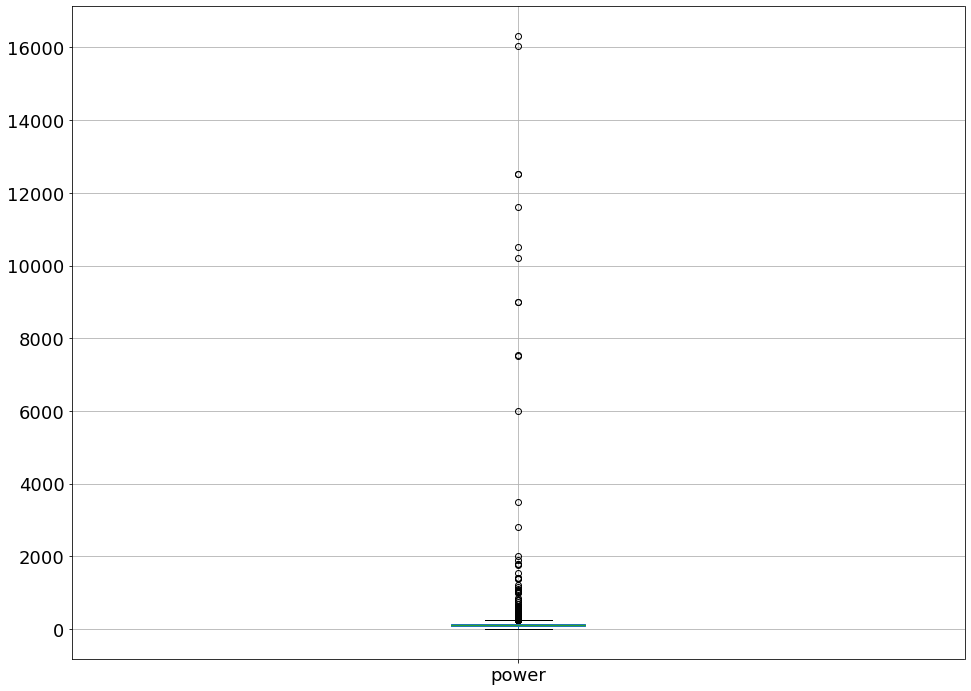

In [15]:
data.boxplot(figsize=default_figsize, column=['power'])

<AxesSubplot:>

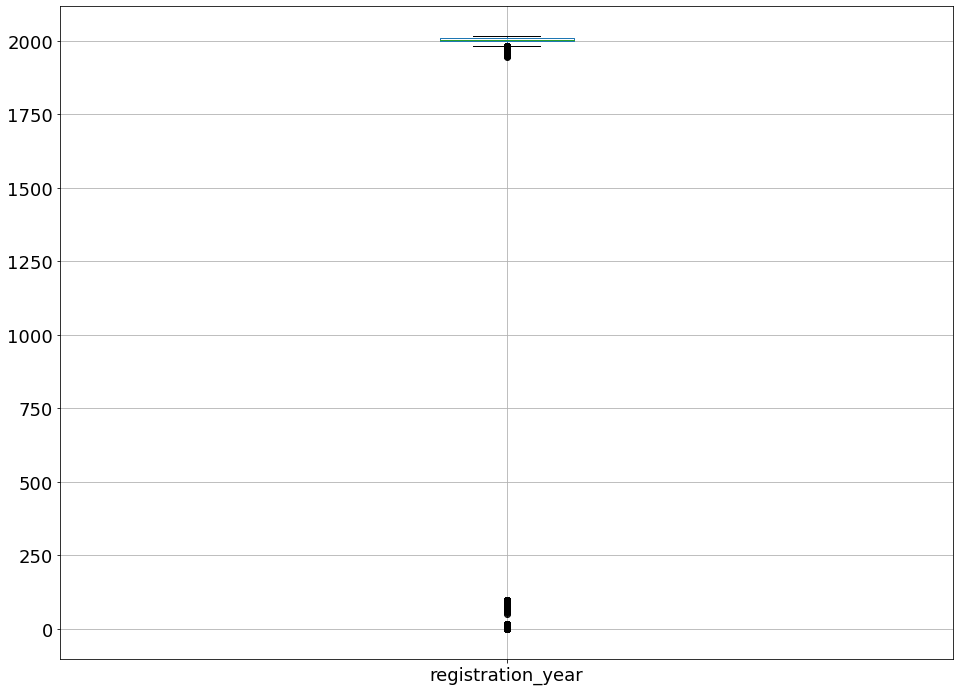

In [16]:
data.boxplot(figsize=default_figsize, column=['registration_year'])

<AxesSubplot:>

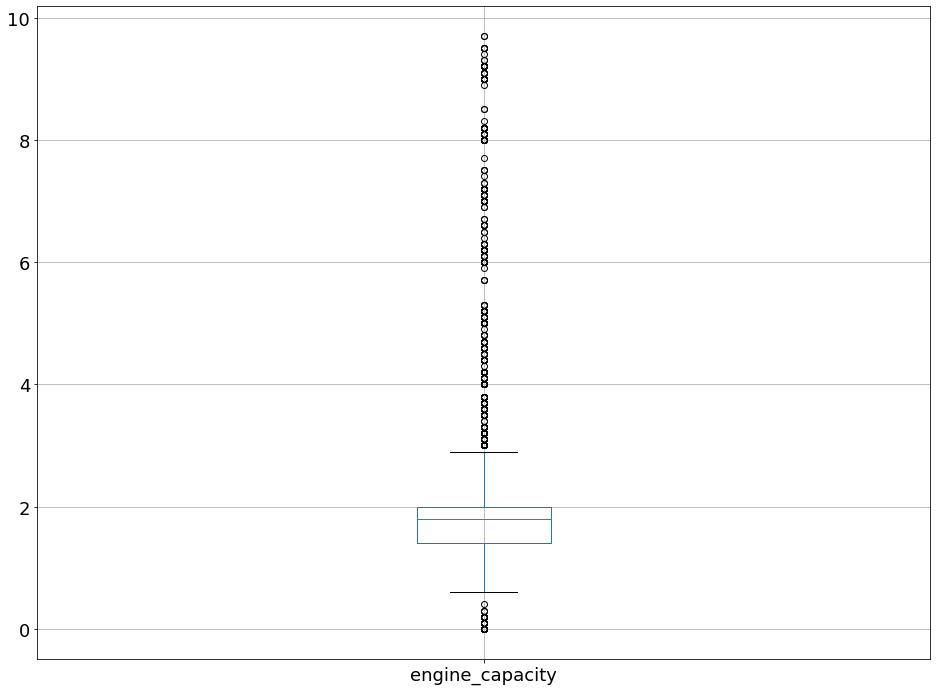

In [17]:
data.boxplot(figsize=default_figsize, column=['engine_capacity'])

## Statistics

In [18]:
def is_high(row):
    clone = row.copy()
    clone[row.abs() > 0.3] = '#ff937d'
    clone[row.abs() > 0.5] = '#f56942'
    clone[row.abs() > 0.6] = '#ff795e'
    clone[(row.abs() <= 0.3) | (row.abs() == 1.0)] = ''
    return [f'background-color: {cell}' for cell in clone]

In [19]:
data.corr().style.apply(is_high)

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price
engine_capacity,1.000000,0.000904,0.272703,0.122118,0.028722,-0.002471,0.197016
registration_year,0.000904,1.000000,0.006052,0.002814,0.003487,-0.001905,0.083783
power,0.272703,0.006052,1.000000,-0.016903,-0.028802,0.026804,0.149864
mileage,0.122118,0.002814,-0.016903,1.000000,0.092635,-0.031784,-0.269454
damage,0.028722,0.003487,-0.028802,0.092635,1.000000,0.007505,-0.061676
zipcode,-0.002471,-0.001905,0.026804,-0.031784,0.007505,1.000000,0.049684
insurance_price,0.197016,0.083783,0.149864,-0.269454,-0.061676,0.049684,1.000000


In [20]:
data['engine_capacity'].mean(), data['engine_capacity'].median()

(1.8694662949317935, 1.8)

In [21]:
data['power'].mean(), data['power'].median()

(120.90786, 110.0)

In [22]:
data['insurance_price'].mean(), data['insurance_price'].median()

(420.9332300323989, 230.0)

## Empty values

In [29]:
data[data['power'] == 0.0].head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price
54851,NaN,NaN,1980,manual,0,andere,5000,diesel,mercedes_benz,0.0,82194,740.0
52536,1.6,NaN,2015,NaN,0,sportage,5000,gasoline,kia,NaN,8412,570.0
31405,NaN,NaN,2016,auto,0,fortwo,150000,gasoline,smart,NaN,20146,90.0
77148,NaN,other,1998,manual,0,andere,150000,diesel,nissan,1.0,29633,110.0
14001,NaN,limousine,2009,NaN,0,focus,125000,NaN,ford,1.0,79106,1160.0


In [30]:
len(data[data['power'] == 0.0])

4314

In [32]:
data[data['engine_capacity'] == 0.0].head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price
25577,0.0,limousine,2000,manual,75,astra,60000,gasoline,opel,0.0,32107,100.0
20573,0.0,bus,2010,auto,158,ducato,150000,diesel,fiat,0.0,82380,910.0
49384,0.0,bus,2007,manual,101,ducato,150000,diesel,fiat,0.0,69181,200.0
45031,0.0,coupé,2010,manual,161,tt,150000,gasoline,audi,NaN,44807,490.0
18420,0.0,limousine,1982,manual,60,andere,150000,diesel,mercedes_benz,0.0,40468,300.0


In [33]:
len(data[data['engine_capacity'] == 0.0])

28

In [34]:
data[data['insurance_price'] == 0.0]

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price


In [36]:
len(data[data['insurance_price'] == 0.0])

0